**Presentation of the test results**

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#extract a shareable link from google drive where the cleaned dataset resides
#original google drive link - https://drive.google.com/file/d/19C6RISwVpnc-hCVWNhvd0PyLCBgDKsG5/view?usp=sharing
#change the format of the link by noting the ID and assign it to a variable link

data = 'https://drive.google.com/uc?id=19C6RISwVpnc-hCVWNhvd0PyLCBgDKsG5'

In [ ]:
upsampled = pd.read_csv(data)

In [ ]:
upsampled

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19317,2750,299.7,309.2,1685.0,28.9,179,1,0,0,0,0,0
19318,4760,303.5,311.6,1361.0,46.5,62,1,0,1,0,0,0
19319,3696,302.2,311.3,1530.0,37.3,207,1,1,0,0,0,0
19320,7088,300.6,310.3,1648.0,30.5,217,1,1,0,0,0,0


In [ ]:
#upsampled=pd.read_csv('/content/Group_5_UpsampledDataset.csv')

In [ ]:
X = upsampled.drop('Machine_failure', axis=1)
y = upsampled['Machine_failure']

In [ ]:
upsampled.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.096307,0.327518,-0.007175,0.009077,0.022869,-0.066888,0.055009,-0.073008,-0.086362,0.029060,-0.014582
Air temperature [K],0.096307,1.000000,0.858668,-0.146194,0.099171,-0.061165,0.220258,-0.034046,0.468056,-0.060021,-0.076724,0.020805
Process temperature [K],0.327518,0.858668,1.000000,-0.067274,0.043797,-0.023943,0.099389,-0.012398,0.209306,-0.050072,-0.018672,0.023905
Rotational speed [rpm],-0.007175,-0.146194,-0.067274,1.000000,-0.916865,-0.058708,-0.310469,0.121516,-0.372674,0.082446,-0.305783,-0.011326
Torque [Nm],0.009077,0.099171,0.043797,-0.916865,1.000000,0.068604,0.381294,-0.146795,0.271477,0.113655,0.392311,0.001185
Tool wear [min],0.022869,-0.061165,-0.023943,-0.058708,0.068604,1.000000,0.260501,0.345774,-0.114522,-0.127221,0.478352,0.032437
Machine_failure,-0.066888,0.220258,0.099389,-0.310469,0.381294,0.260501,1.000000,0.266133,0.455990,0.406669,0.407620,0.009663
TWF,0.055009,-0.034046,-0.012398,0.121516,-0.146795,0.345774,0.266133,1.000000,-0.121354,-0.090326,-0.064395,0.103784
HDF,-0.073008,0.468056,0.209306,-0.372674,0.271477,-0.114522,0.455990,-0.121354,1.000000,-0.149292,-0.116839,-0.022031
PWF,-0.086362,-0.060021,-0.050072,0.082446,0.113655,-0.127221,0.406669,-0.090326,-0.149292,1.000000,-0.020231,-0.019648


<Axes: >

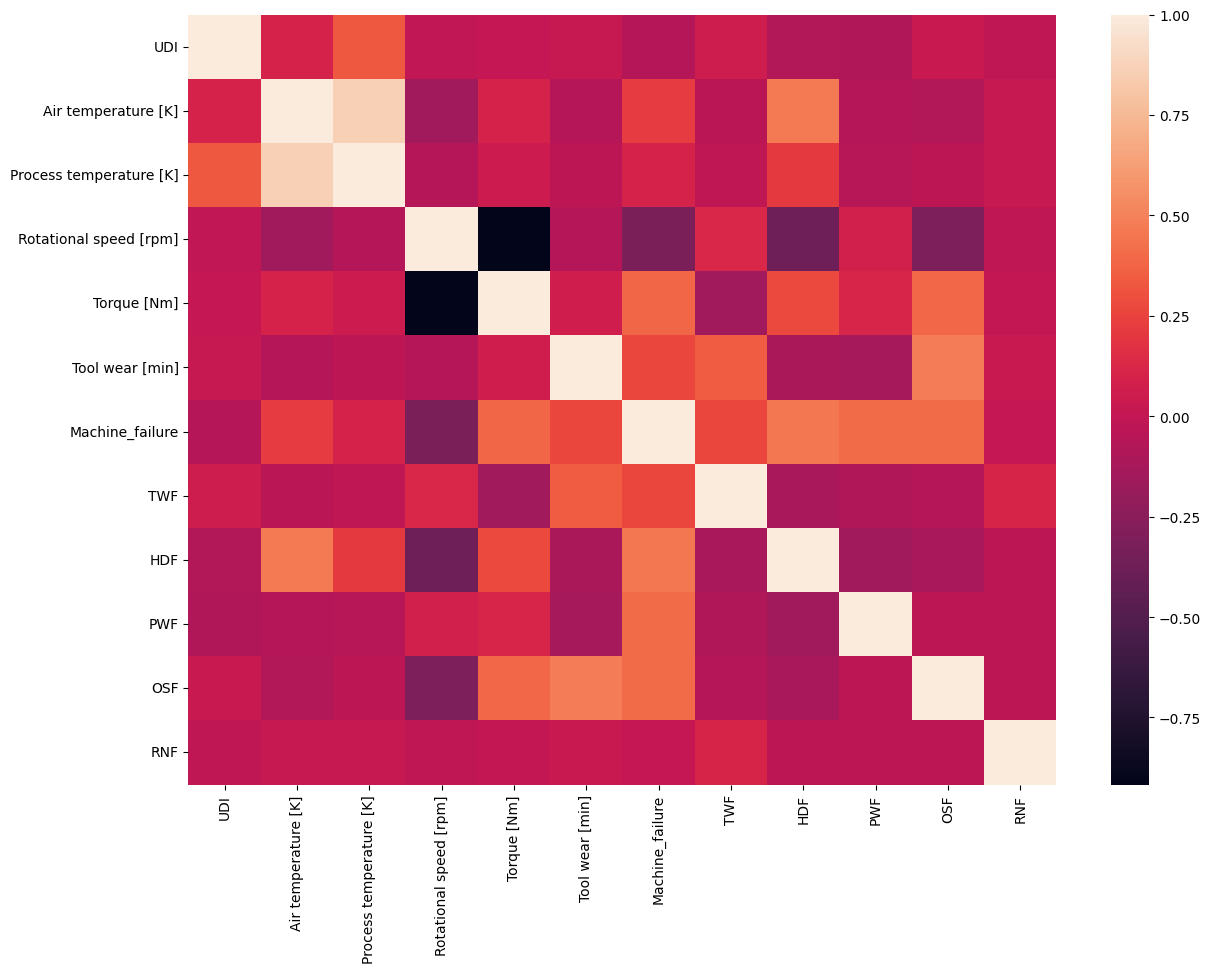

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(upsampled.corr())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling the data using standard scaler**

In [ ]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Taking the empty lists to get the accuracy, precision, recall and f1_score**

In [ ]:
accuracy = []
precision=[]
recall=[]
f1_score=[]

In [ ]:
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy="most_frequent")
baseline_clf.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
baseline_pred = baseline_clf.predict(X_test_scaled)

In [ ]:
baseline_accuracy = np.mean(baseline_pred == y_test)
print("Baseline accuracy:", baseline_accuracy)
accuracy.append(baseline_accuracy)

Baseline accuracy: 0.49754204398447605


**A comparison with a naive classification technique (baseline)**

In [ ]:
cl_report_naive = classification_report(y_test, baseline_pred, output_dict = True)
precision.append(cl_report_naive['weighted avg']['precision'])
recall.append(cl_report_naive['weighted avg']['recall'])
f1_score.append(cl_report_naive['weighted avg']['f1-score'])
print(classification_report(y_test, baseline_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1942
           1       0.50      1.00      0.66      1923

    accuracy                           0.50      3865
   macro avg       0.25      0.50      0.33      3865
weighted avg       0.25      0.50      0.33      3865



In [ ]:
conf_matrix_baseline = confusion_matrix(y_test, baseline_pred)
conf_matrix_baseline

array([[   0, 1942],
       [   0, 1923]])

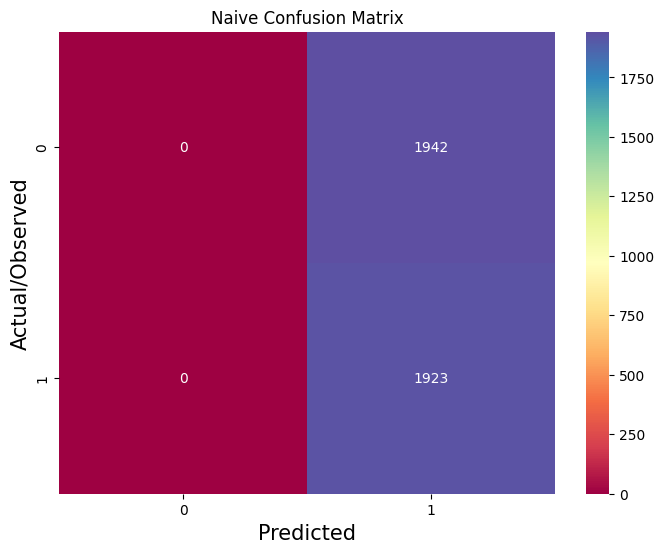

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_baseline,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Naive Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Training the models using the best hyper parameters that we obtained in all the 4 models and predicting the test data.**

**Linear Classifier using the best hyper parameters**

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD_linear = SGDClassifier(loss='hinge', alpha= 0.1, learning_rate='optimal', random_state=0)
SGD_linear.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.1, random_state=0)

In [ ]:
y_pred_linear = SGD_linear.predict(X_test_scaled)
linear_acc = accuracy_score(y_test, y_pred_linear)
accuracy.append(linear_acc)
print("Accuracy of Linear model for test data is",linear_acc)

Accuracy of Linear model for test data is 0.986287192755498


In [ ]:
cl_report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
precision.append(cl_report_linear['weighted avg']['precision'])
recall.append(cl_report_linear['weighted avg']['recall'])
f1_score.append(cl_report_linear['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_linear

array([[1942,    0],
       [  53, 1870]])

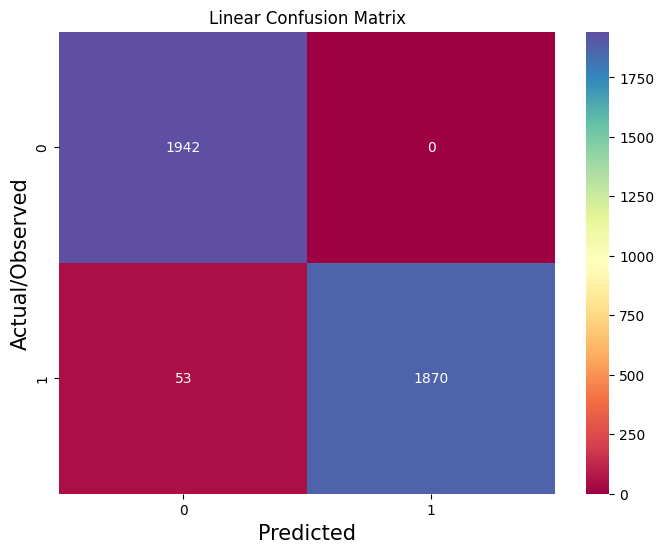

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_linear,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**KNN using the best hyper parameters**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy.append(knn_acc)
print("Accuracy of knn model for test data is",knn_acc)

Accuracy of knn model for test data is 0.9968952134540751


In [ ]:
cl_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision.append(cl_report_knn['weighted avg']['precision'])
recall.append(cl_report_knn['weighted avg']['recall'])
f1_score.append(cl_report_knn['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1942
           1       0.99      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[1930,   12],
       [   0, 1923]])

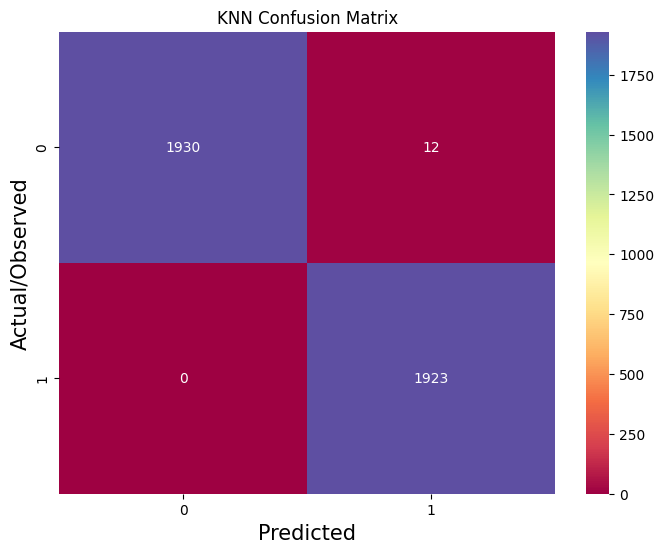

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_knn,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Random Forest Classifier using the best hyper parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=201,
                       random_state=42)

In [ ]:
y_pred_rfc = rfc.predict(X_test_scaled)
acc_rfc = accuracy_score(y_test,y_pred_rfc)
accuracy.append(acc_rfc)
print("Accuracy for Random Forest for test data",acc_rfc)

Accuracy for Random Forest for test data 0.988098318240621


In [ ]:
cl_report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
precision.append(cl_report_rfc['weighted avg']['precision'])
recall.append(cl_report_rfc['weighted avg']['recall'])
f1_score.append(cl_report_rfc['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1942
           1       1.00      0.98      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix_rfc

array([[1942,    0],
       [  46, 1877]])

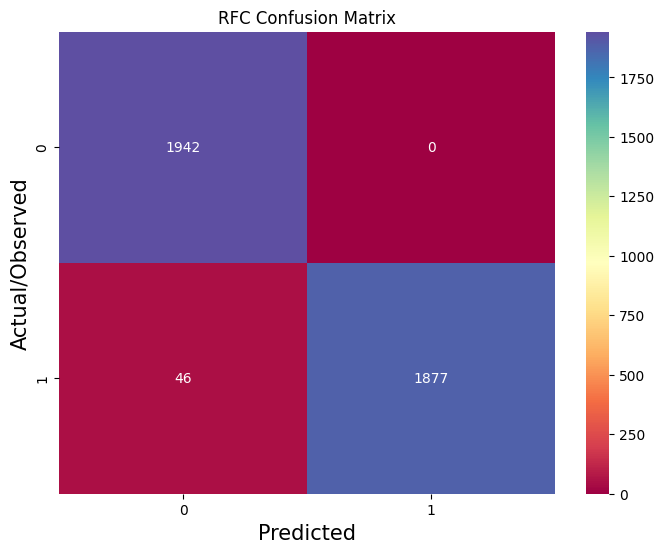

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_rfc,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Decision Tree using the best hyper parameters**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 8, random_state=42)
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=42)

In [ ]:
y_pred_tree = dec_tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred_tree)
accuracy.append(acc_tree)
print("Best Accuracy for Decision Tree for test data",acc_tree)

Best Accuracy for Decision Tree for test data 0.9989650711513584


In [ ]:
cl_report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
precision.append(cl_report_tree['weighted avg']['precision'])
recall.append(cl_report_tree['weighted avg']['recall'])
f1_score.append(cl_report_tree['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_tree

array([[1938,    4],
       [   0, 1923]])

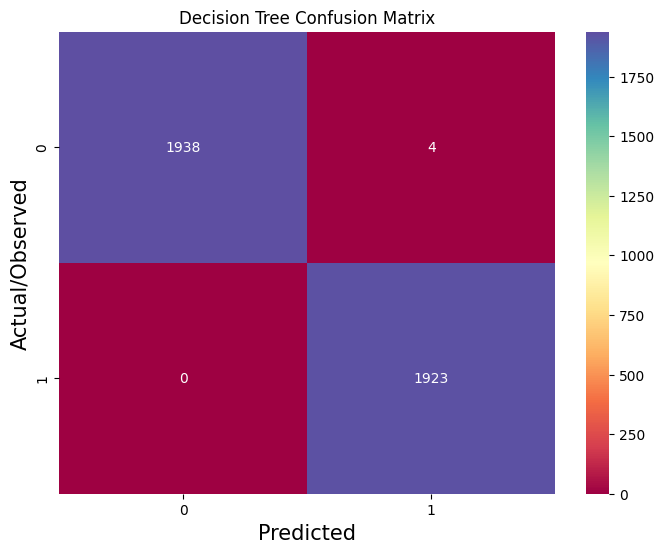

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_tree,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Support Vector Machine with Linear Kernel**

In [ ]:
from sklearn.svm import SVC

# Training the linear SVM model
svm_linear = SVC(kernel='linear', C=10)
svm_linear.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [ ]:
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
accuracy.append(acc_linear)
print("Best Accuracy for SVM linear for test data",acc_linear)

Best Accuracy for SVM linear for test data 0.986287192755498


In [ ]:
cl_report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
precision.append(cl_report_linear['weighted avg']['precision'])
recall.append(cl_report_linear['weighted avg']['recall'])
f1_score.append(cl_report_linear['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_svm_lin = confusion_matrix(y_test, y_pred_linear)
conf_matrix_svm_lin

array([[1942,    0],
       [  53, 1870]])

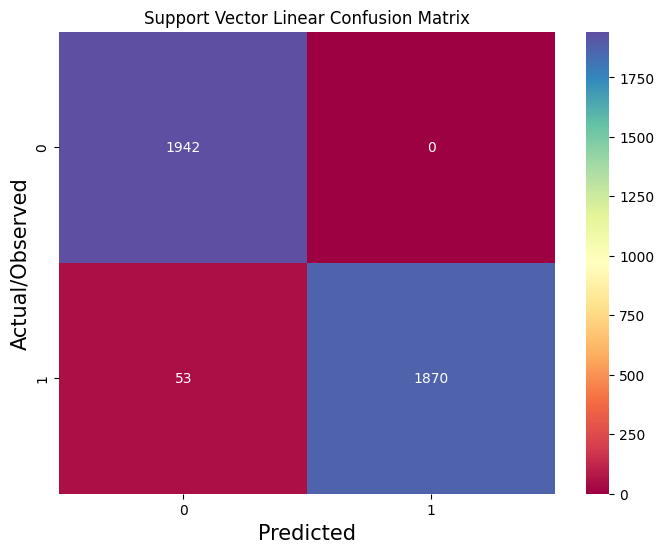

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svm_lin,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Support Vector Machine with Non Linear Kernel**

In [ ]:
# Training the non-linear SVM model
svm_non_linear = SVC(kernel='rbf', C=10)
svm_non_linear.fit(X_train_scaled, y_train)

SVC(C=10)

In [ ]:
y_pred_nl = svm_non_linear.predict(X_test_scaled)
acc_nl = accuracy_score(y_test, y_pred_nl)
accuracy.append(acc_nl)
print("Best Accuracy for SVM non linear for test data",acc_nl)

Best Accuracy for SVM non linear for test data 0.986287192755498


In [ ]:
cl_report_nl = classification_report(y_test, y_pred_nl, output_dict=True)
precision.append(cl_report_nl['weighted avg']['precision'])
recall.append(cl_report_nl['weighted avg']['recall'])
f1_score.append(cl_report_nl['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_nl))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_svm_non_lin = confusion_matrix(y_test, y_pred_nl)
conf_matrix_svm_non_lin

array([[1942,    0],
       [  53, 1870]])

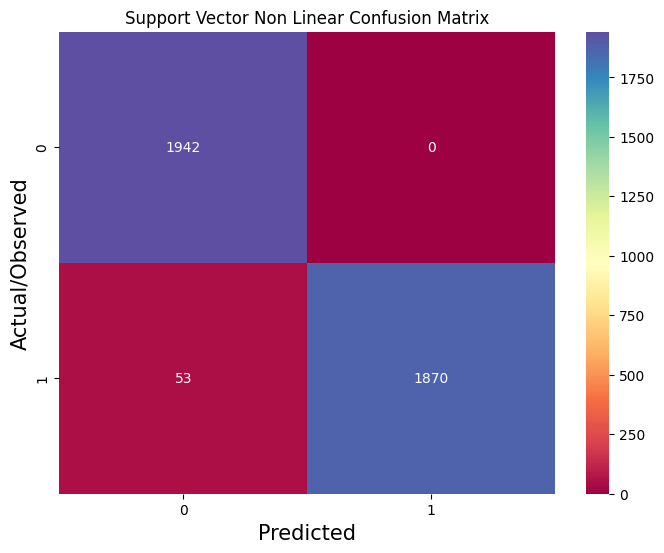

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svm_non_lin,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Non Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Best Models by using the variable selection using LASSO**

**Random Forest using variable selection with Lasso**

In [ ]:
features_lasso=['Machine_failure', 'TWF', 'HDF', 'PWF']

In [ ]:
X_best = upsampled[features_lasso]

In [ ]:
X_train_b, X_test_b, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

In [ ]:
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

In [ ]:
rfc_lasso = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [ ]:
rfc_lasso.fit(X_train_b, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=201,
                       random_state=42)

In [ ]:
y_pred_rfc_lasso = rfc_lasso.predict(X_test_b)
acc_rfc_lasso = accuracy_score(y_test, y_pred_rfc_lasso)
accuracy.append(acc_rfc_lasso)
print(f" The testing data accuracy for the Random forest model is {acc_rfc_lasso}")

 The testing data accuracy for the Random forest model is 1.0


In [ ]:
cl_report_rfc_lasso = classification_report(y_test, y_pred_rfc_lasso, output_dict=True)
precision.append(cl_report_rfc_lasso['weighted avg']['precision'])
recall.append(cl_report_rfc_lasso['weighted avg']['recall'])
f1_score.append(cl_report_rfc_lasso['weighted avg']['f1-score'])

In [ ]:
print(classification_report(y_test, y_pred_rfc_lasso))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2903
           1       1.00      1.00      1.00      2894

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



In [ ]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_lasso = confusion_matrix(y_test, y_pred_rfc_lasso)
conf_matrix_rfc_lasso

array([[2903,    0],
       [   0, 2894]])

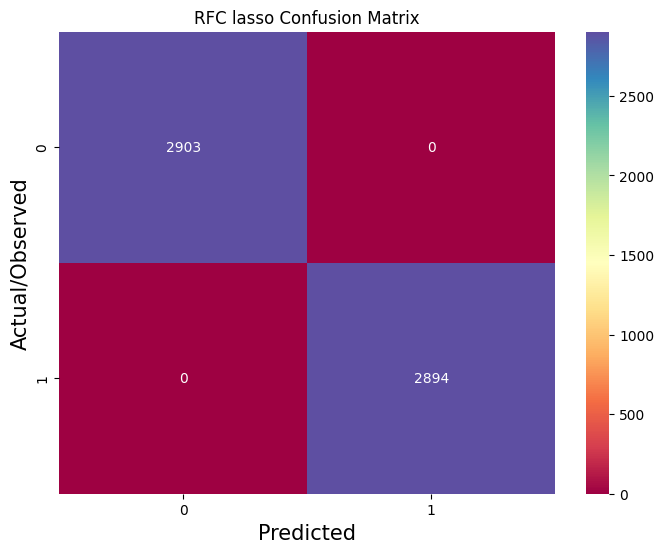

In [ ]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_lasso,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC lasso Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Best Models by using the variable selection as Bidirectional elimination as the wrapper method**

**RFC using Bidirectional features**

In [ ]:
features_wrapper=['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF']

In [ ]:
X_w = upsampled[features_wrapper]

In [ ]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X_w, y, test_size=0.2, random_state=42)

In [ ]:
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)
rfc_w = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)
rfc_w.fit(X_train_w, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=201,
                       random_state=42)

In [ ]:
y_pred_rfc_w = rfc_w.predict(X_test_w)
acc_rfc_w = accuracy_score(y_test, y_pred_rfc_w)
accuracy.append(acc_rfc_w)
print(f" The testing data accuracy for the RFC using bidirectional features model is {acc_rfc_w}")

 The testing data accuracy for the RFC using bidirectional features model is 0.9710219922380336


In [ ]:
cl_report_rfc_w = classification_report(y_test, y_pred_rfc_w, output_dict=True)
precision.append(cl_report_rfc_w['weighted avg']['precision'])
recall.append(cl_report_rfc_w['weighted avg']['recall'])
f1_score.append(cl_report_rfc_w['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_rfc_w))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1942
           1       0.96      0.98      0.97      1923

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865



In [ ]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_w = confusion_matrix(y_test, y_pred_rfc_w)
conf_matrix_rfc_w

array([[1873,   69],
       [  43, 1880]])

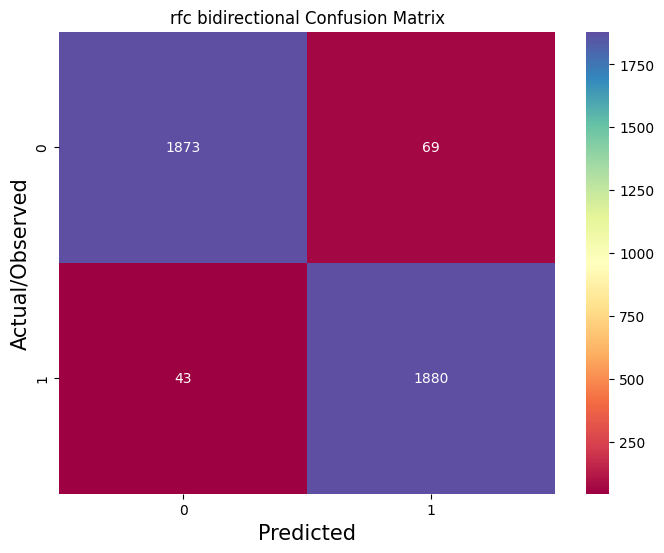

In [ ]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_w,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("rfc bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**KNN using Bidirectional features**

In [ ]:
features_wrapper2= ['UDI', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF']

In [ ]:
X_w2 = upsampled[features_wrapper2]

In [ ]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X_w2, y, test_size=0.2, random_state=42)

In [ ]:
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)

In [ ]:
#Instantiate the KNN model
from mlxtend.feature_selection import SequentialFeatureSelector
knn_model = KNeighborsClassifier()

# Number of features to select
n_features_to_select = 5  # Adjust this based on your preference or after experimentation

# Forward feature selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(knn_model,
                                 k_features=n_features_to_select,
                                 forward=True,
                                 floating=False,
                                 verbose=2,
                                 scoring='accuracy',
                                 cv=5)
sfs.fit(X_train_w, y_train)



[2023-12-02 01:18:30] Features: 1/5 -- score: 0.935368676661325
[2023-12-02 01:18:34] Features: 2/5 -- score: 0.9626064152363222
[2023-12-02 01:18:38] Features: 3/5 -- score: 0.9709515963174814
[2023-12-02 01:18:40] Features: 4/5 -- score: 0.9816909292638186
[2023-12-02 01:18:41] Features: 5/5 -- score: 0.9865431627020482

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(5, 5),
                          scoring='accuracy', verbose=2)

In [ ]:
selected_feature_indices = sfs.k_feature_idx_

# Extract the selected features from the training and testing data
X_train_selected = X_train_w[:, list(selected_feature_indices)]
X_test_selected = X_test_w[:, list(selected_feature_indices)]

In [ ]:
knn_model.fit(X_train_selected, y_train)

# Predict using the trained KNN model
y_pred_knn_w = knn_model.predict(X_test_selected)

In [ ]:
# Evaluate the accuracy
acc_knn_w = accuracy_score(y_test, y_pred_knn_w)
accuracy.append(acc_knn_w)
print(f" The testing data accuracy for the KNN using bidirectional features model is {acc_knn_w}")

 The testing data accuracy for the KNN using bidirectional features model is 0.9888745148771022


In [ ]:
cl_report_knn_w = classification_report(y_test, y_pred_knn_w, output_dict=True)
precision.append(cl_report_knn_w['weighted avg']['precision'])
recall.append(cl_report_knn_w['weighted avg']['recall'])
f1_score.append(cl_report_knn_w['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_knn_w))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1942
           1       0.98      1.00      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_knn_w = confusion_matrix(y_test, y_pred_knn_w)
conf_matrix_knn_w

array([[1899,   43],
       [   0, 1923]])

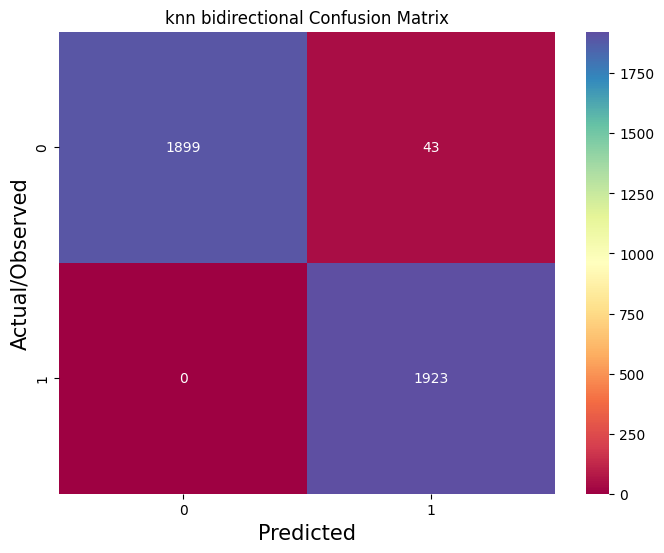

In [ ]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_knn_w,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("knn bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**XGBoost Model**

In [ ]:
import xgboost as xgb

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_pred_xgboost = xgb_model.predict(X_test_scaled)

In [ ]:
acc_xgboost = accuracy_score(y_test, y_pred_xgboost)
accuracy.append(acc_xgboost)

In [ ]:
print("Best Accuracy for XGBoost model for test data",acc_xgboost)

Best Accuracy for XGBoost model for test data 0.9997412677878396


In [ ]:
cl_report_xgboost = classification_report(y_test, y_pred_xgboost, output_dict=True)
precision.append(cl_report_xgboost['weighted avg']['precision'])
recall.append(cl_report_xgboost['weighted avg']['recall'])
f1_score.append(cl_report_xgboost['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1942
           1       1.00      1.00      1.00      1923

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [ ]:
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
conf_matrix_xgboost

array([[1941,    1],
       [   0, 1923]])

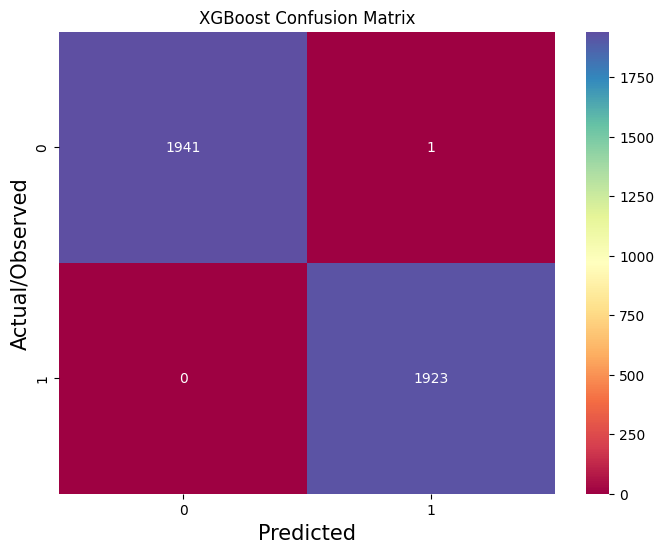

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_xgboost,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Extreme Machine Learning Model**

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create and train the ELM model
elm_model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000, random_state=42)
elm_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_elm = elm_model.predict(X_test_scaled)

In [ ]:
acc_elm = accuracy_score(y_test, y_pred_elm)
accuracy.append(acc_elm)
print("Best Accuracy for ELM model for test data",acc_elm)

Best Accuracy for ELM model for test data 0.986287192755498


In [ ]:
cl_report_elm = classification_report(y_test, y_pred_elm, output_dict=True)
precision.append(cl_report_elm['weighted avg']['precision'])
recall.append(cl_report_elm['weighted avg']['recall'])
f1_score.append(cl_report_elm['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_elm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1942
           1       1.00      0.97      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_elm = confusion_matrix(y_test, y_pred_elm)
conf_matrix_elm

array([[1942,    0],
       [  53, 1870]])

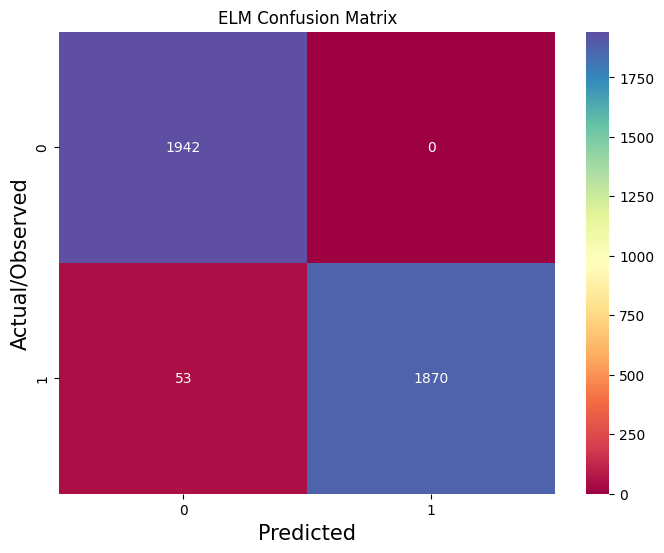

In [ ]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_elm,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("ELM Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Deep learning model with two layers**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import VotingClassifier
# Create a sequential model
model = Sequential()

In [ ]:
# Add the first hidden layer with input shape (assuming X_train has feature dimensions)
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
484/484 [==============================] - 2s 3ms/step - loss: 0.1230 - accuracy: 0.9741 - val_loss: 0.0547 - val_accuracy: 0.9863
Epoch 2/10
484/484 [==============================] - 1s 2ms/step - loss: 0.0477 - accuracy: 0.9874 - val_loss: 0.0495 - val_accuracy: 0.9863
Epoch 3/10
484/484 [==============================] - 2s 3ms/step - loss: 0.0438 - accuracy: 0.9874 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 4/10
484/484 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 5/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9877 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 6/10
484/484 [==============================] - 1s 2ms/step - loss: 0.0320 - accuracy: 0.9879 - val_loss: 0.0322 - val_accuracy: 0.9904
Epoch 7/10
484/484 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9884 - val_loss: 0.0280 - val_accuracy: 0.9886
Epoch 

In [ ]:
# Make predictions
y_pred_deep = (model.predict(X_test_scaled) > 0.5).astype("int32")

121/121 [==============================] - 0s 1ms/step


In [ ]:
acc_deep = accuracy_score(y_test, y_pred_deep)
accuracy.append(acc_deep)
print("Best Accuracy for deep learning model for test data",acc_deep)

Best Accuracy for deep learning model for test data 0.9940491591203104


In [ ]:
cl_report_deep = classification_report(y_test, y_pred_deep, output_dict=True)
precision.append(cl_report_deep['weighted avg']['precision'])
recall.append(cl_report_deep['weighted avg']['recall'])
f1_score.append(cl_report_deep['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_deep))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1942
           1       0.99      0.99      0.99      1923

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
conf_matrix_deep = confusion_matrix(y_test, y_pred_deep)
conf_matrix_deep

array([[1929,   13],
       [  10, 1913]])

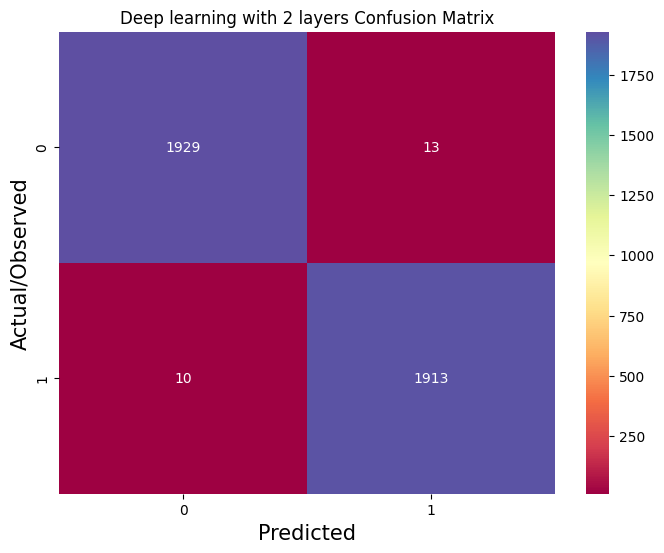

In [ ]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_deep,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Deep learning with 2 layers Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Plotting the accuracy graph for all the models**

In [ ]:
accuracy

[0.49754204398447605,
 0.986287192755498,
 0.9968952134540751,
 0.988098318240621,
 0.9989650711513584,
 0.986287192755498,
 0.986287192755498,
 1.0,
 0.9710219922380336,
 0.9888745148771022,
 0.9997412677878396,
 0.986287192755498,
 0.9940491591203104]

In [ ]:
models = ["Naive", "Linear Classifier","KNN", "Random Forest", "Decision Tree", "SVM Linear", "SVM non-Linear", "Lasso_RFC","Bi_RFC", "Bi_KNN","XGBoost","ELM","Deep Learning MOdel"]


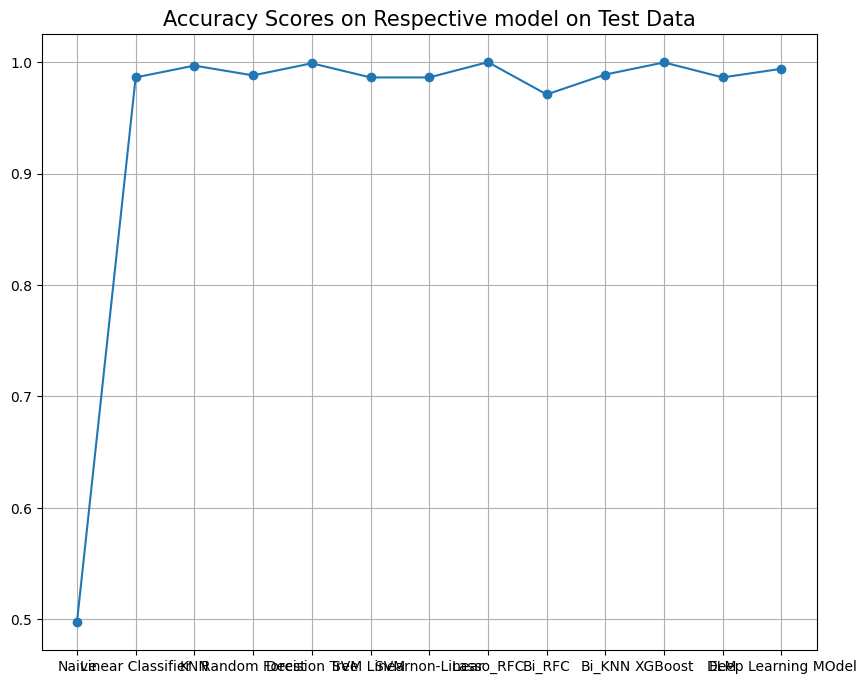

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.plot(models,accuracy, marker='o')
plt.title('Accuracy Scores on Respective model on Test Data', fontsize=15)
plt.grid()
plt.show()

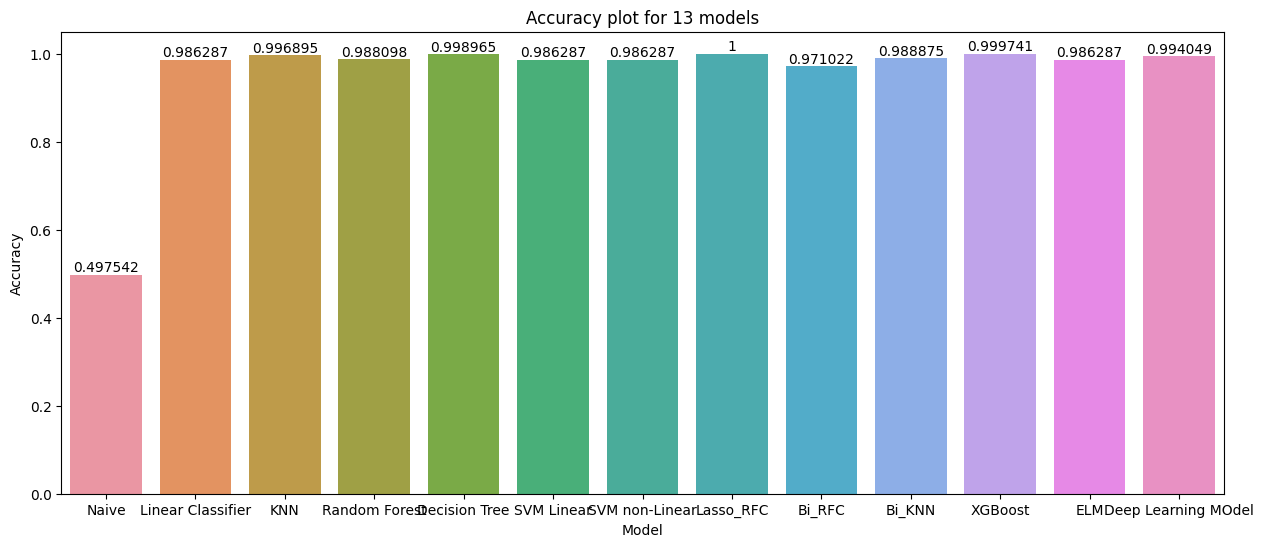

In [ ]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(precision,recall,f1_score)

[0.24754808553225033, 0.9866514928978332, 0.9969144679442824, 0.9883737092672464, 0.9989672194208937, 0.9866514928978332, 0.9866514928978332, 1.0, 0.9711091758680601, 0.9891178494957616, 0.9997414022640413, 0.9866514928978332, 0.9940503951690701] [0.49754204398447605, 0.986287192755498, 0.9968952134540751, 0.988098318240621, 0.9989650711513584, 0.986287192755498, 0.986287192755498, 1.0, 0.9710219922380336, 0.9888745148771022, 0.9997412677878396, 0.986287192755498, 0.9940491591203104] [0.330605857146561, 0.9862836885749066, 0.9968952309128377, 0.9880959353540225, 0.9989650753082556, 0.9862836885749066, 0.9862836885749066, 1.0, 0.9710216391830547, 0.9888737462487427, 0.999741268099609, 0.9862836885749066, 0.9940491782420775]


In [ ]:
print("Length of Accuracy Array:", len(accuracy))
print("Length of Precision Array:", len(precision))
print("Length of Recall Array:", len(recall))
print("Length of F1 Score Array:", len(f1_score))

Length of Accuracy Array: 13
Length of Precision Array: 13
Length of Recall Array: 13
Length of F1 Score Array: 13


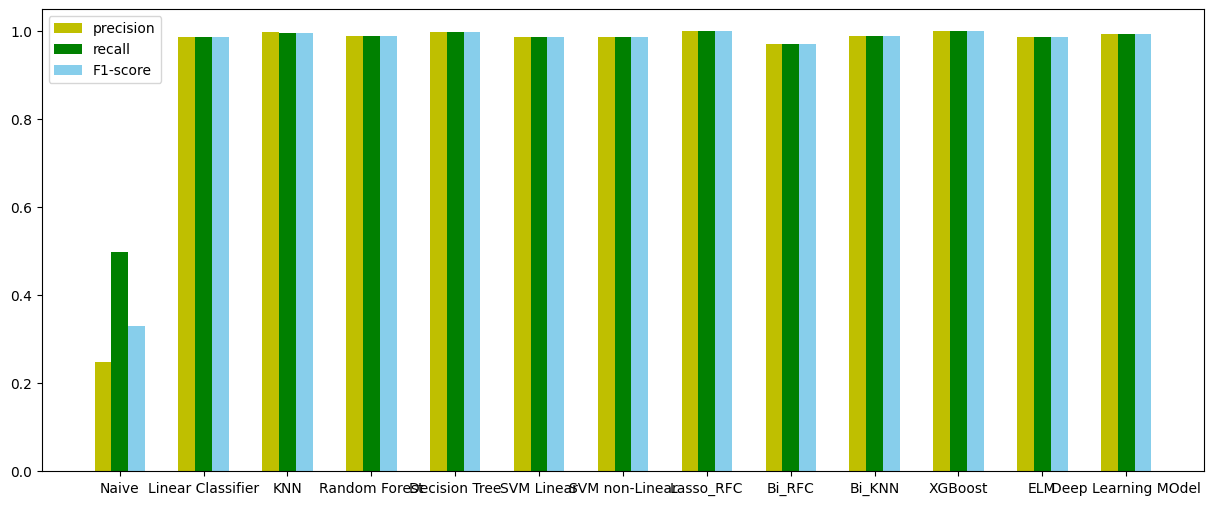

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(accuracy))
bar_width = 0.2
ax.bar(x_pos,precision, width=bar_width, color='y')
ax.bar(x_pos+bar_width, recall, width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, f1_score, width=bar_width, color='skyblue')

ax.set_xticks(x_pos+1*bar_width)
ax.set_xticklabels(models)
ax.legend(['precision','recall','F1-score'])

In [ ]:
# Load the results dataframe
final_results = pd.DataFrame({
    'Classifier': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

In [ ]:
final_results

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Naive,0.497542,0.247548,0.497542,0.330606
1,Linear Classifier,0.986287,0.986651,0.986287,0.986284
2,KNN,0.996895,0.996914,0.996895,0.996895
3,Random Forest,0.988098,0.988374,0.988098,0.988096
4,Decision Tree,0.998965,0.998967,0.998965,0.998965
5,SVM Linear,0.986287,0.986651,0.986287,0.986284
6,SVM non-Linear,0.986287,0.986651,0.986287,0.986284
7,Lasso_RFC,1.000000,1.000000,1.000000,1.000000
8,Bi_RFC,0.971022,0.971109,0.971022,0.971022
9,Bi_KNN,0.988875,0.989118,0.988875,0.988874
